In [1]:
import json 
import pandas as pd

with open('paragraphs.json') as train_file:
    dict_train = json.load(train_file)

# Dados semi processados
data = pd.DataFrame(dict_train)
data

,ID,ID_RAW_TEXT,TEXT_SOURCE,PARAGRAPH,ENTITY,POLARITY
0,1,R001,@g1politica,Os candidatos à Presidência mais bem posiciona...,DILMA,NE
1,2,R001,@g1politica,Os dados foram disponibilizados neste sábado ...,,
2,3,R001,@g1politica,A lei permite que os presidenciáveis arrecadem...,,
3,4,R001,@g1politica,As maiores doadoras para a campanha de Dilma s...,DILMA,NE
4,5,R001,@g1politica,Os maiores colaboradores da campanha de Aécio ...,AÉCIO NEVES,NE
...,...,...,...,...,...,...
1442,1443,R131,@VEJA,»O que é presidencialismo de coalizão,,
1443,1444,R131,@VEJA,As ações da Petrobras fecharam em queda de mai...,DILMA,NG
1444,1445,R131,@VEJA,Pesquisa feita pelo Ibope e encomendada pela C...,DILMA,NE
1445,1446,R131,@VEJA,Estatais em queda,,


In [2]:
# stopwroks em portugues

stop_list = pd.read_csv('https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt').to_numpy().T[0]

In [3]:
# Removendo números -> trocando por NUM
# Definindo corpus

corpus = data['PARAGRAPH'].replace('\d+','NUM',regex=True).to_list()
corpus[0]

'Os candidatos à Presidência mais bem posicionados nas pesquisas arrecadaram  do início da campanha até o dia NUM de setembro  R  NUM milhões em doações  A candidata do PT  Dilma Rousseff  foi a que mais captou  R  NUM NUM milhões  quase o dobro que a soma de seus dois principais adversários  Aécio Neves  do PSDB  que recebeu R  NUM NUM milhões  e Marina Silva  do PSB  com R  NUM NUM milhões '

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    analyzer='word',
    lowercase=True,
    strip_accents='unicode',
    stop_words=list(stop_list),
    ngram_range=(1,1)
    )

X = vectorizer.fit_transform(corpus).toarray()

# vectorizer.get_feature_names()
X.shape

(1447, 7137)

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['POLARITY'])

print(le.classes_)
y = le.transform(data['POLARITY'])

y

['' 'NE' 'NG' 'PO']


array([1, 0, 0, ..., 1, 0, 0])

In [14]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Tokenização

In [37]:
# from nltk.tokenize import word_tokenize


# def getToken(text):
#     tokenizer = nltk.RegexpTokenizer(r"\w+")
#     return tokenizer.tokenize(text)
import nltk
import joblib
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')

class PreProcess:

    def __init__(self,text):
        self.text = text

    def toToken(self):
        tokenizer = nltk.RegexpTokenizer(r"\w+")
        return tokenizer.tokenize(self.text)
    
    def toLower(self):
        token_list = self.token()
        return [i.lower()for i in token_list]
    
    def removePunc(self):
        punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
        low_list = self.toLower
        return [test_str.replace(ele, " ") for ele in low_list if ele in punc]

# Download de stopworks em português
# nltk.download('stopwords')

# vectorizer = CountVectorizer(analyzer='word', ngram_range=(2,2),lowercase=True,stop_words='portuguese')

corpus = data['PARAGRAPH'].to_list()

# X = vectorizer.fit_transform(corpus)
# X


P = PreProcess(corpus[0])
# print(P.removePunc())

[nltk_data] Downloading package stopwords to /home/davi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
vectorizer = CountVectorizer(stop_words='portuguese')

X = vectorizer.fit_transform(corpus)


ValueError: not a built-in stop list: portuguese

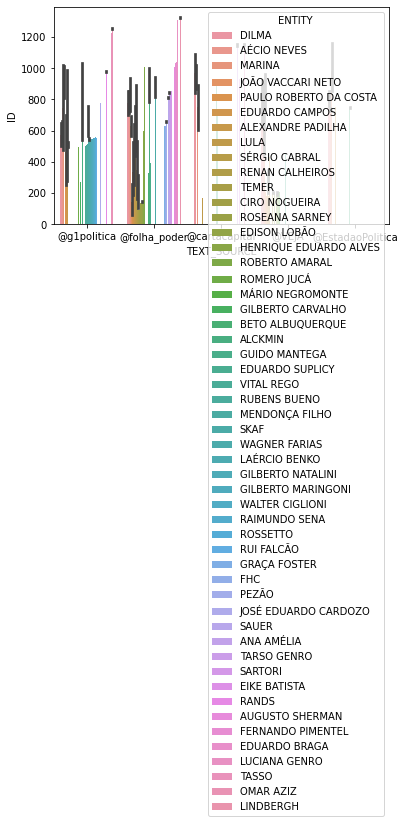

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV